# SY09 Project - Data analysis - Cocktails

Thomas BORDES, Damien WILLETT.

## 0/ Importing the data set

In [3]:
import pandas as pd

In [4]:
bc = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-05-26/boston_cocktails.csv')

In [5]:
bc.shape

(3643, 6)

In [6]:
bc.head()

,name,category,row_id,ingredient_number,ingredient,measure
0,Gauguin,Cocktail Classics,1,1,Light Rum,2 oz
1,Gauguin,Cocktail Classics,1,2,Passion Fruit Syrup,1 oz
2,Gauguin,Cocktail Classics,1,3,Lemon Juice,1 oz
3,Gauguin,Cocktail Classics,1,4,Lime Juice,1 oz
4,Fort Lauderdale,Cocktail Classics,2,1,Light Rum,1 1/2 oz


## 1/ Exploratory analysis and data cleaning

First of all, the columns are converted to lower case.

In [7]:
bc['name'] = bc['name'].str.lower()
bc['category'] = bc['category'].str.lower()
bc['ingredient'] = bc['ingredient'].str.lower()
bc['measure'] = bc['measure'].str.lower()

### 1.1/ Data before cleaning

In [8]:
import numpy as np

Number of individuals: 989 cocktails.

In [9]:
len(np.unique(bc['row_id']))

989

Number of variables: 554 different ingredients.

In [10]:
len(np.unique(bc['ingredient']))

554

### 1.2/ Number of ingredients per cocktail

In [14]:
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import seaborn as sns
sns.set_palette(sns.color_palette('hls'))

In [15]:
bc.groupby(['row_id'], as_index=False)['ingredient_number'].max()

,row_id,ingredient_number
0,1,4
1,2,4
2,3,2
3,4,3
4,5,5
...,...,...
984,986,4
985,987,4
986,988,3
987,989,3


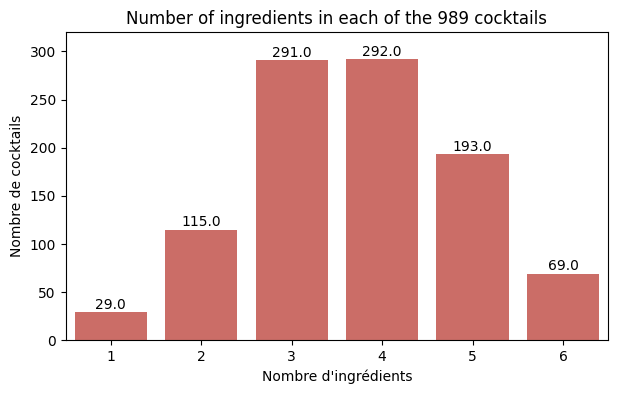

In [16]:
plt.figure(figsize=(7, 4))
fig = sns.countplot(data=bc.groupby(['row_id'], as_index=False)['ingredient_number'].max(), x='ingredient_number')
fig.set(title="Number of ingredients in each of the 989 cocktails", xlabel="Nombre d'ingrédients", ylabel="Nombre de cocktails")
fig.set_ylim(top=320)
fig.xaxis.set_major_locator(plticker.MultipleLocator(base=1))
fig.yaxis.set_major_locator(plticker.MultipleLocator(base=50))
for p in fig.patches:
    fig.annotate(p.get_height(), (p.get_x()+p.get_width()/2., p.get_height()+8), ha='center', va='center')
plt.savefig('imgs/Number of ingredients in each of the 989 cocktails.pdf', bbox_inches='tight')
plt.show()
plt.close()

### 1.3/ Cocktail categories

Some categories have very small numbers, just a few units. Cocktails belonging to these categories should be removed from the data.

In [17]:
bc_sorted = bc.groupby(['name', 'category'], as_index=False).count()
bc_sorted.sort_values(by='category', inplace=True)

In [18]:
bc_sorted['category']
#sns.histplot(y=bc_sorted['category'])

291      brandy
172      brandy
122      brandy
252      brandy
249      brandy
         ...   
175    whiskies
424    whiskies
425    whiskies
131    whiskies
0      whiskies
Name: category, Length: 989, dtype: object

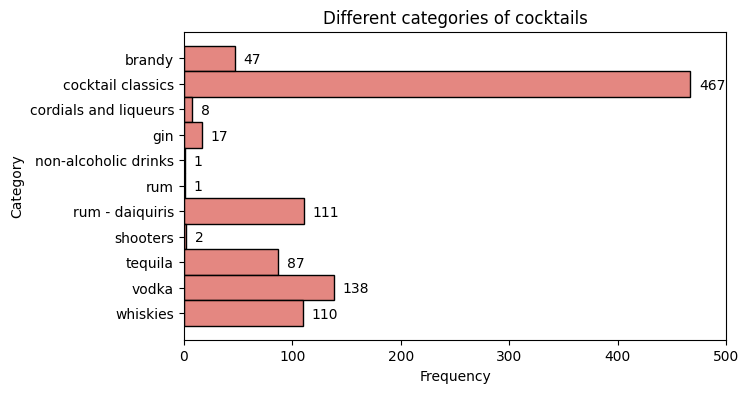

In [19]:
plt.figure(figsize=(7, 4))
fig = sns.histplot(y=bc_sorted['category'])
fig.set(title="Different categories of cocktails", ylabel="Category", xlabel="Frequency", xlim=[0,500])
for p in fig.patches:
    fig.annotate(p.get_width(), (p.get_width()+8, p.get_y()+0.7))
plt.savefig('imgs/categories_de_cocktails.pdf', bbox_inches='tight')
plt.show()
plt.close()

In [20]:
bc.drop(bc[bc['category'] == 'cordials and liqueurs' ].index, inplace=True)
bc.drop(bc[bc['category'] == 'non-alcoholic drinks' ].index, inplace=True)
bc.drop(bc[bc['category'] == 'rum' ].index, inplace=True)
bc.drop(bc[bc['category'] == 'shooters' ].index, inplace=True)

### 1.4/ Cleaning the ‘measure’ column

Fractions are written as decimals.

In [21]:
bc['measure'] = bc['measure'].str.replace(' ?1/2', '.5', regex=True)
bc['measure'] = bc['measure'].str.replace(' ?1/4', '.25', regex=True)
bc['measure'] = bc['measure'].str.replace(' ?3/4', '.75', regex=True)
bc['measure'] = bc['measure'].str.replace(' ?1/3', '.33', regex=True)
bc['measure'] = bc['measure'].str.replace(' ?2/3', '.66', regex=True)

We're looking at the various existing measures.

In [22]:
np.unique(bc['measure'])

array(['.25 oz', '.33 oz', '.5 or 1', '.5 oz', '.5 tsp', '.75 oz', '1',
       '1 .75 oz', '1 750-ml', '1 dash', '1 oz', '1 splash', '1 tsp',
       '1.25 oz', '1.5 oz', '1.66 oz', '1.75 oz', '12', '16 oz', '1c',
       '2', '2 -  3 drops', '2 750-ml', '2 bottles', '2 dashes', '2 oz',
       '2.25 oz', '2.5 oz', '24 oz', '25', '3 oz', '3 slices', '4 oz',
       '5', '5 or 6', '5 oz', '6', '6 fresh', '6 oz', '7', 'for glass',
       'splash'], dtype=object)

Some measurements are corrected by hand.

In [23]:
bc.loc[bc['measure'] == '1 750-ml', 'measure'] = '1.75 ml'
bc.loc[bc['measure'] == '2 750-ml', 'measure'] = '2.75 ml'
bc.loc[bc['measure'] == '1 .75 oz', 'measure'] = '1.75 oz'
bc.loc[bc['measure'] == 'splash', 'measure'] = '1 splash'

Certain units of measurement are corrected.

In [24]:
bc['measure'] = bc['measure'].str.replace('dashes', 'dash', regex=True)

In [25]:
np.unique(bc['measure'])

array(['.25 oz', '.33 oz', '.5 or 1', '.5 oz', '.5 tsp', '.75 oz', '1',
       '1 dash', '1 oz', '1 splash', '1 tsp', '1.25 oz', '1.5 oz',
       '1.66 oz', '1.75 ml', '1.75 oz', '12', '16 oz', '1c', '2',
       '2 -  3 drops', '2 bottles', '2 dash', '2 oz', '2.25 oz', '2.5 oz',
       '2.75 ml', '24 oz', '25', '3 oz', '3 slices', '4 oz', '5',
       '5 or 6', '5 oz', '6', '6 fresh', '6 oz', '7', 'for glass'],
      dtype=object)

A new column is created, from which the numerical value of the measurement is extracted.

In [26]:
bc['measure_value'] = bc['measure'].str.extract('(\d*\.\d+|\d+)', expand=False).astype(float)

We create a new column in which we extract the unit of measurement.

In [27]:
bc['measure_unit'] = bc['measure'].str.replace('(\d+\.\d+|\d+)', '', regex=True)
bc['measure_unit'] = bc['measure_unit'].str.replace('[^\w\s]', '', regex=True)
bc['measure_unit'] = bc['measure_unit'].str.replace(' ', '')

In [28]:
bc.loc[bc['measure_unit'] == 'dashes', 'measure_unit'] = 'dash'
bc.loc[bc['measure_unit'] == 'drops', 'measure_unit'] = 'drop'
bc.loc[bc['measure_unit'] == 'slices', 'measure_unit'] = 'slice'
bc.loc[bc['measure_unit'] == 'bottles', 'measure_unit'] = 'bottle'
bc.loc[bc['measure_unit'] == 'forglass', 'measure_unit'] = 'for glass'

The different units of measurement are displayed.

In [29]:
np.unique(bc['measure_unit'])

array(['', 'bottle', 'c', 'dash', 'drop', 'for glass', 'fresh', 'ml',
       'or', 'oz', 'slice', 'splash', 'tsp'], dtype=object)

We delete the original measurement column, which is no longer useful.

In [30]:
bc.drop(columns='measure', inplace=True)

In order to be able to compare them, we only keep ingredients whose measurements are expressed in ‘oz’ (the most common unit).

In [31]:
bc.drop(bc[bc['measure_unit'] != 'oz' ].index, inplace=True)

The column indicating the unit of measurement can be deleted, as all the remaining measurements are expressed in ‘oz’.

In [32]:
bc.drop(columns='measure_unit', inplace=True)

To simplify things, we'll rename the column.

In [33]:
bc.rename(columns={'measure_value': 'measure'}, inplace=True)

The various measurement values are displayed.

In [34]:
np.unique(bc['measure'])

array([ 0.25,  0.33,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.66,  1.75,
        2.  ,  2.25,  2.5 ,  3.  ,  4.  ,  5.  ,  6.  , 16.  , 24.  ])

Two cocktails with extreme values for the dose of their ingredients are eliminated.

In [35]:
bc.drop(bc.loc[bc['name'] == 'applejack punch'].index, inplace=True)
bc.drop(bc.loc[bc['name'] == 'bloody scotsman'].index, inplace=True)

### 1.5/ Cleaning the ingredient column

Certain terms characterising ingredients or indications that are not essential are deleted.

In [36]:
bc['ingredient'] = bc['ingredient'].str.replace('-', ' ')
bc['ingredient'] = bc['ingredient'].str.replace('fresh ', '', regex=True)
bc['ingredient'] = bc['ingredient'].str.replace('^each ', '', regex=True)
bc['ingredient'] = bc['ingredient'].str.replace('mr. boston ', '', regex=True)
bc['ingredient'] = bc['ingredient'].str.replace('old mr. boston ', '', regex=True)
bc['ingredient'] = bc['ingredient'].str.replace(' liqueur$', '', regex=True)
bc['ingredient'] = bc['ingredient'].str.replace(' (if desired)$', '', regex=True)

In [37]:
bc

,name,category,row_id,ingredient_number,ingredient,measure
0,gauguin,cocktail classics,1,1,light rum,2.00
1,gauguin,cocktail classics,1,2,passion fruit syrup,1.00
2,gauguin,cocktail classics,1,3,lemon juice,1.00
3,gauguin,cocktail classics,1,4,lime juice,1.00
4,fort lauderdale,cocktail classics,2,1,light rum,1.50
...,...,...,...,...,...,...
3638,vow of silence,gin,990,2,grapefruit juice,0.75
3639,vow of silence,gin,990,3,lime juice,0.50
3640,vow of silence,gin,990,4,yellow chartreuse,0.50
3641,vow of silence,gin,990,5,amaro,0.25


Simplify the naming of ingredients. To do this, we group together the terms designating the same ingredients (giving priority to naming the most frequently used terms).

In [38]:
ingredients = ['lemon juice', 'gin', 'lime juice', 'vodka', 'simple syrup', 'rum', 'triple sec', 'vermouth', 'powdered sugar', 'grenadine', 'brandy', 'orange juice', 'tequila', 'egg', 'bitters', 'maraschino', 'pineapple juice', 'whiskey', 'grapefruit juice', 'gin', 'benedictine', 'cacao', 'dubonnet', 'anisette', 'amaretto', 'cranberry juice', 'cream', 'chartreuse', 'menthe', 'milk', 'agave nectar', 'sherry', 'coffee', 'sugar', 'water', 'banana', 'cassis', 'whisky', 'peach', 'apricot', 'absinthe', 'champagne']
for i in range(len(ingredients)):
    bc.loc[bc['ingredient'].str.contains(ingredients[i]), 'ingredient'] = ingredients[i]

In [39]:
bc

,name,category,row_id,ingredient_number,ingredient,measure
0,gauguin,cocktail classics,1,1,rum,2.00
1,gauguin,cocktail classics,1,2,passion fruit syrup,1.00
2,gauguin,cocktail classics,1,3,lemon juice,1.00
3,gauguin,cocktail classics,1,4,lime juice,1.00
4,fort lauderdale,cocktail classics,2,1,rum,1.50
...,...,...,...,...,...,...
3638,vow of silence,gin,990,2,grapefruit juice,0.75
3639,vow of silence,gin,990,3,lime juice,0.50
3640,vow of silence,gin,990,4,chartreuse,0.50
3641,vow of silence,gin,990,5,amaro,0.25


The names of certain ingredients are corrected.

In [40]:
bc.loc[bc['ingredient'].str.contains('juice of a lemon'), 'ingredient'] = 'lemon juice'
bc.loc[bc['ingredient'].str.contains('juice of a lime'), 'ingredient'] = 'lime juice'
bc.loc[bc['ingredient'].str.contains('whisky'), 'ingredient'] = 'whiskey'
bc.loc[bc['ingredient'].str.contains('cacao'), 'ingredient'] = 'cocoa'

After cleaning, 263 different ingredients remain.

In [41]:
len(np.unique(bc['ingredient']))

263

### 1.6/ Most common ingredients

We create a new dataframe ``bc_mci`` containing the ``most common ingredients`` of ``bc``. Common ingredients are defined as those that appear in more than 15 cocktail recipes.

In [42]:
freq_ingredients = bc['ingredient'].value_counts()
ingredients = dict(zip(freq_ingredients.keys().tolist(), freq_ingredients.tolist()))

In [43]:
bc_mci = bc[bc['ingredient'].isin(freq_ingredients.index[freq_ingredients >= 15].tolist())].copy()
bc_mci['count'] = bc_mci['ingredient'].apply(lambda x: ingredients[x])
bc_mci.sort_values(by=['count'], ascending=False, inplace=True)

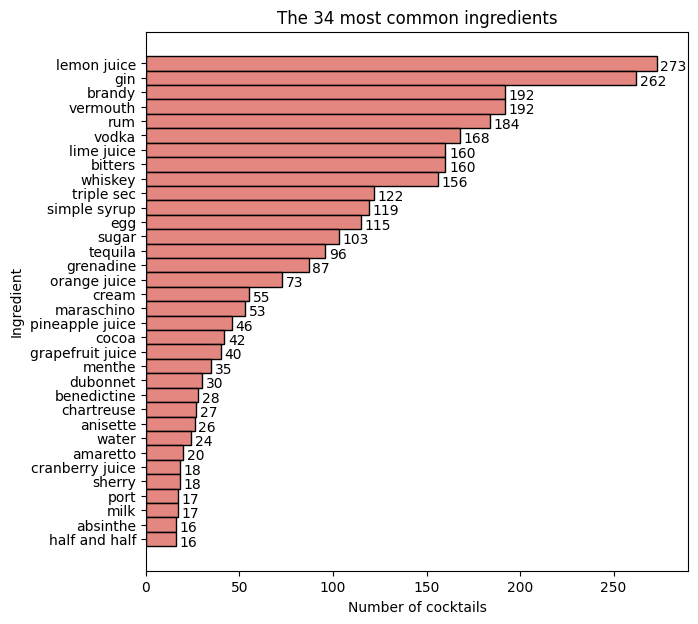

In [44]:
plt.figure(figsize=(7, 7))
fig = sns.histplot(y=bc_mci['ingredient'])
fig.set(title="The 34 most common ingredients", ylabel="Ingredient", xlabel="Number of cocktails", xlim=[0,290])
for p in fig.patches:
    fig.annotate(p.get_width(), (p.get_width()+2, p.get_y()+1))
plt.savefig('imgs/most_common_ingredients.pdf', bbox_inches='tight')
plt.show()
plt.close()

### 1.7/ Data after cleaning (keeping only the most common ingredients)

Number of individuals: 963 cocktails.

In [45]:
len(np.unique(bc_mci['row_id']))

963

Number of variables: 34 different ingredients.

In [46]:
len(np.unique(bc_mci['ingredient']))

34

### 1.8/ Creating an individual-variable table

- The cocktails represent the individuals, arranged in rows.
- The ingredients represent the explanatory variables, arranged in columns.

In [ ]:
from sklearn.preprocessing import StandardScaler

bc_mci_wide = bc_mci.pivot_table(index=['name', 'category'], columns='ingredient', values='measure', aggfunc='sum', fill_value=0)

In [ ]:
bc_mci_wide.shape

In [49]:
bc_mci_wide.head()

NameError: name 'bc_mci_wide' is not defined

To make the ingredients commensurable, centre and reduce.

In [45]:
bc_mci_wide_cr = StandardScaler().fit_transform(bc_mci_wide)
bc_mci_wide_cr = pd.DataFrame(bc_mci_wide_cr, index=bc_mci_wide.index, columns=bc_mci_wide.columns)

In [46]:
bc_mci_wide_cr.head()

,ingredient,absinthe,amaretto,anisette,benedictine,bitters,brandy,chartreuse,cocoa,cranberry juice,cream,...,rum,sherry,simple syrup,sugar,tequila,triple sec,vermouth,vodka,water,whiskey
name,category,,,,,,,,,,,,,,,,,,,,,
1626,whiskies,-0.115450,-0.125038,-0.146227,-0.148378,2.757554,0.595737,-0.15692,-0.202860,-0.110532,-0.210508,...,-0.420274,-0.126736,-0.324091,-0.329550,-0.321076,-0.341898,-0.395941,-0.4312,-0.132696,3.574557
19th century,whiskies,-0.115450,-0.125038,-0.146227,-0.148378,-0.392534,-0.413400,-0.15692,4.305307,-0.110532,-0.210508,...,-0.420274,-0.126736,-0.324091,-0.329550,-0.321076,-0.341898,-0.395941,-0.4312,-0.132696,1.977203
a. j.,cocktail classics,-0.115450,-0.125038,-0.146227,-0.148378,-0.392534,-0.413400,-0.15692,-0.202860,-0.110532,-0.210508,...,-0.420274,-0.126736,-0.324091,-0.329550,-0.321076,-0.341898,-0.395941,-0.4312,-0.132696,-0.418829
absinthe cocktail,cocktail classics,8.661773,-0.125038,9.912072,-0.148378,1.182510,-0.413400,-0.15692,-0.202860,-0.110532,-0.210508,...,-0.420274,-0.126736,-0.324091,-0.329550,-0.321076,-0.341898,-0.395941,-0.4312,4.556719,-0.418829
absinthe drip cocktail,cocktail classics,-0.115450,-0.125038,-0.146227,-0.148378,-0.392534,-0.413400,-0.15692,-0.202860,-0.110532,-0.210508,...,-0.420274,-0.126736,-0.324091,3.092084,-0.321076,-0.341898,-0.395941,-0.4312,-0.132696,-0.418829


### 1.9/ Correlations between the most frequent ingredients

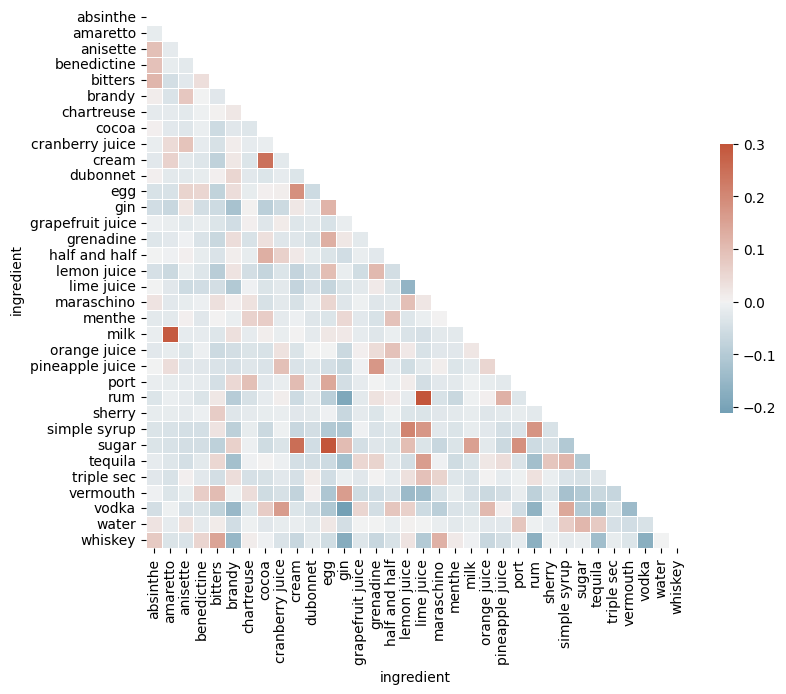

In [47]:
corr = bc_mci_wide.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
fig, ax = plt.subplots(figsize=(9, 7))
sns.heatmap(corr, mask=mask, cmap=sns.diverging_palette(230, 20, as_cmap=True), vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.savefig('imgs/correlations_ingredients.pdf', bbox_inches='tight')
plt.show()
plt.close()

## 2/ Principal component analysis (PCA)

In [48]:
from sklearn.decomposition import PCA

cls = PCA(n_components=34)
pcs = cls.fit_transform(bc_mci_wide_cr)

The result of the PCA is placed in a new dataframe.

In [49]:
df_pca = pd.DataFrame(pcs, columns=["PC"+str(i) for i in list(range(1, cls.n_features_+1))], index=bc_mci_wide_cr.index)
df_pca.reset_index(inplace=True)
df_pca.set_index('name', inplace=True)
df_pca.head()

C:\Users\Thomas\anaconda3\envs\bikes-count\lib\site-packages\sklearn\utils\deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


,category,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34
name,,,,,,,,,,,,,,,,,,,,,
1626,whiskies,-0.176211,2.571268,-0.428896,-1.506432,1.158230,0.568623,-0.214203,0.146370,-0.718654,...,0.133106,0.298540,-0.685648,-0.240617,1.429387,-0.835821,0.208616,0.163028,0.243314,1.109279
19th century,whiskies,0.174663,0.111678,1.224294,-1.543388,1.330797,-0.787267,-1.240900,-0.377792,-2.034231,...,-0.552313,-0.738127,1.607679,0.614812,-0.389662,-1.580109,1.076747,1.035491,-0.117194,-0.076531
a. j.,cocktail classics,-0.329896,0.149355,0.515315,0.135347,0.053042,-0.240825,0.553022,0.308405,0.216719,...,-0.068209,-0.182335,-0.037882,-0.126765,-0.092874,-0.151006,-0.058776,-0.411776,-0.037489,-1.112933
absinthe cocktail,cocktail classics,0.003648,2.510380,-0.326655,-1.484482,0.904991,1.885767,-3.688290,2.793712,6.096105,...,0.061563,0.844558,0.050793,0.605097,-0.780854,0.947358,-0.448363,0.902590,-0.210960,-0.244629
absinthe drip cocktail,cocktail classics,1.469671,-0.446063,-0.223394,0.010118,0.559518,0.089400,0.364779,-0.090432,0.358147,...,-0.657285,-0.515306,-0.562499,0.253412,-0.883245,-0.182047,-0.536879,0.039725,-2.175825,-1.074696


### 2.1/ Determining the number of principal components using the elbow method

The cumulative ratio of variance explained is calculated.

In [50]:
cum_sum_exp = np.cumsum(cls.explained_variance_ratio_)
cum_sum_exp

array([0.06028494, 0.11198957, 0.15808883, 0.2008366 , 0.24181393,
       0.2807922 , 0.31877069, 0.35591421, 0.39131533, 0.42487467,
       0.45800276, 0.49099618, 0.52301923, 0.55374444, 0.5842021 ,
       0.61422234, 0.64259272, 0.67051793, 0.69755286, 0.72430734,
       0.75004904, 0.7752227 , 0.79981795, 0.82401571, 0.84713068,
       0.87013738, 0.89197485, 0.91344089, 0.93300994, 0.95139362,
       0.96816457, 0.98265183, 0.99453522, 1.        ])

In [51]:
cls.explained_variance_ratio_

array([0.06028494, 0.05170463, 0.04609926, 0.04274776, 0.04097733,
       0.03897827, 0.03797849, 0.03714352, 0.03540112, 0.03355934,
       0.03312809, 0.03299341, 0.03202305, 0.03072521, 0.03045766,
       0.03002024, 0.02837038, 0.02792521, 0.02703493, 0.02675448,
       0.0257417 , 0.02517367, 0.02459524, 0.02419776, 0.02311497,
       0.0230067 , 0.02183747, 0.02146604, 0.01956905, 0.01838368,
       0.01677094, 0.01448727, 0.01188339, 0.00546478])

In [52]:
cls.explained_variance_

array([2.05181845, 1.75978494, 1.56900425, 1.45493479, 1.39467759,
       1.32663877, 1.29261093, 1.26419235, 1.20488942, 1.1422038 ,
       1.12752592, 1.12294213, 1.08991563, 1.04574301, 1.03663691,
       1.02174912, 0.96559576, 0.95044404, 0.92014308, 0.91059782,
       0.87612751, 0.85679449, 0.83710753, 0.82357914, 0.78672602,
       0.78304088, 0.74324562, 0.73060416, 0.66603945, 0.62569488,
       0.57080479, 0.49307906, 0.40445529, 0.18599552])

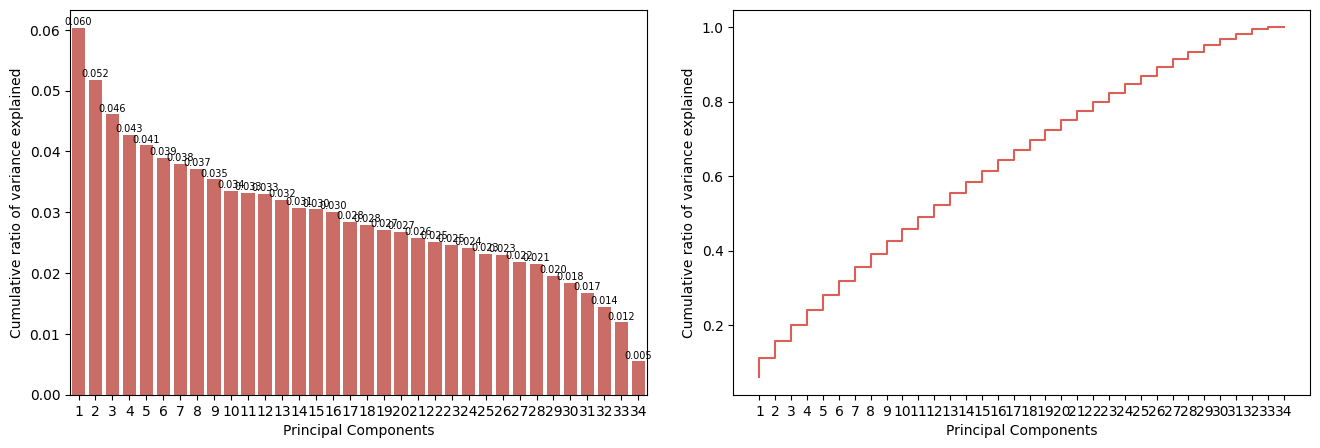

In [53]:
plt.figure(figsize=(16, 5))
plt.gcf().subplots_adjust(wspace = 0.15)

plt.subplot(1, 2, 1)
fig1 = sns.barplot(x=[i for i in range(1, 35)], y=cls.explained_variance_ratio_)
fig1.set(xlabel='Principal Components', ylabel='Cumulative ratio of variance explained')
for p in fig1.patches:
    fig1.annotate(format(p.get_height(), '.3f'), (p.get_x()+p.get_width()/2., p.get_height()+0.001), ha='center', va='center', size=7)
    
plt.subplot(1, 2, 2)
fig2 = sns.lineplot(x=range(1, 35), y=cum_sum_exp, drawstyle='steps-pre')
fig2.set_xticks(range(1, 35))
fig2.set(xlabel='Principal Components', ylabel='Cumulative ratio of variance explained')

plt.savefig('imgs/Principal Components.pdf', bbox_inches='tight')
plt.show()
plt.close()

Thereafter, we will keep the first 20 principal components for which the cumulative ratio of variance explained exceeds the 70% threshold.

In [54]:
df_pca = df_pca.iloc[:, :21]
df_pca.head()

,category,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
name,,,,,,,,,,,,,,,,,,,,,
1626,whiskies,-0.176211,2.571268,-0.428896,-1.506432,1.158230,0.568623,-0.214203,0.146370,-0.718654,...,0.178484,-0.295175,-0.010068,0.364032,0.686931,-1.068019,0.466540,-0.239015,0.419034,0.193617
19th century,whiskies,0.174663,0.111678,1.224294,-1.543388,1.330797,-0.787267,-1.240900,-0.377792,-2.034231,...,-0.473440,-0.199855,-0.886795,-1.172005,-0.164706,-0.574363,-0.419508,-0.531729,-0.022563,-0.215846
a. j.,cocktail classics,-0.329896,0.149355,0.515315,0.135347,0.053042,-0.240825,0.553022,0.308405,0.216719,...,0.254933,0.303258,0.954426,-0.919465,-0.383148,-0.223141,1.449808,-0.801180,0.301878,-0.562457
absinthe cocktail,cocktail classics,0.003648,2.510380,-0.326655,-1.484482,0.904991,1.885767,-3.688290,2.793712,6.096105,...,-2.921502,6.856348,-0.432403,0.419609,-2.886531,-1.841932,-0.653876,-2.709225,-0.355597,3.895067
absinthe drip cocktail,cocktail classics,1.469671,-0.446063,-0.223394,0.010118,0.559518,0.089400,0.364779,-0.090432,0.358147,...,0.024497,-0.308315,0.533268,0.400139,0.142199,-0.293702,0.295632,-0.006472,-0.168106,-0.008658


### 2.2/ Representation of individuals

In the first factorial plane.

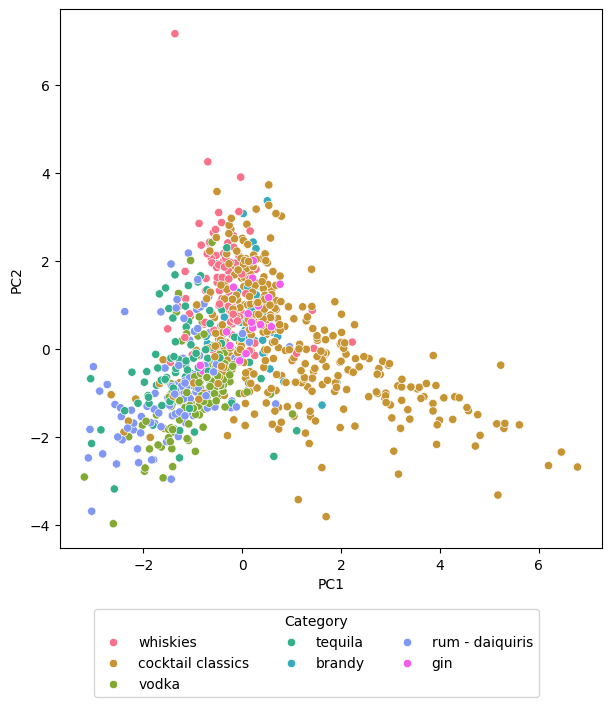

In [55]:
plt.figure(figsize=(7, 7))
fig = sns.scatterplot(x='PC1', y='PC2', data=df_pca, hue=df_pca['category'])
fig.set(xlabel='PC1', ylabel='PC2')
plt.legend(bbox_to_anchor=(0.05, -0.1), loc='upper left', ncol=3, title='Category')
plt.savefig('imgs/representation_pc1_pc2.pdf', bbox_inches='tight')
plt.show()
plt.close()

Dans le deuxième plan factoriel.

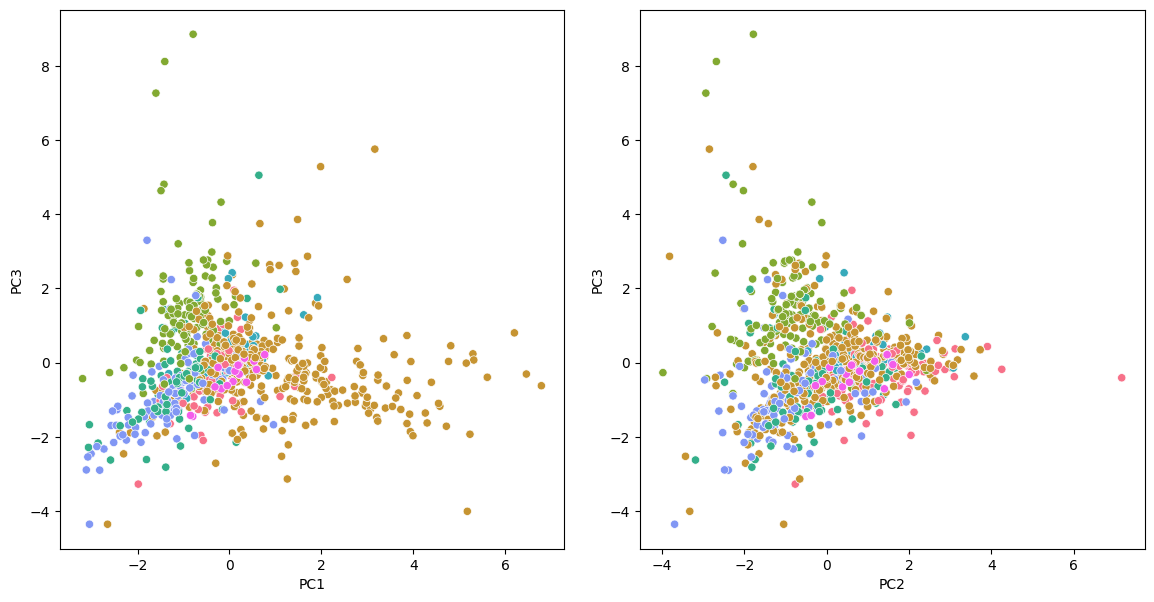

In [56]:
plt.figure(figsize=(14, 7))
plt.gcf().subplots_adjust(wspace = 0.15)
plt.subplot(1, 2, 1)
fig1 = sns.scatterplot(x='PC1', y='PC3', data=df_pca, hue=df_pca['category'], legend=False)
fig1.set(xlabel='PC1', ylabel='PC3')
plt.subplot(1, 2, 2)
fig2 = sns.scatterplot(x='PC2', y='PC3', data=df_pca, hue=df_pca['category'], legend=False)
fig2.set(xlabel='PC2', ylabel='PC3')
plt.savefig('imgs/representation_PC1_PC3_et_PC2_PC3.pdf', bbox_inches='tight')
plt.show()
plt.close()

### 2.3/ Representation of variables

C:\Users\Thomas\anaconda3\envs\bikes-count\lib\site-packages\sklearn\utils\deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


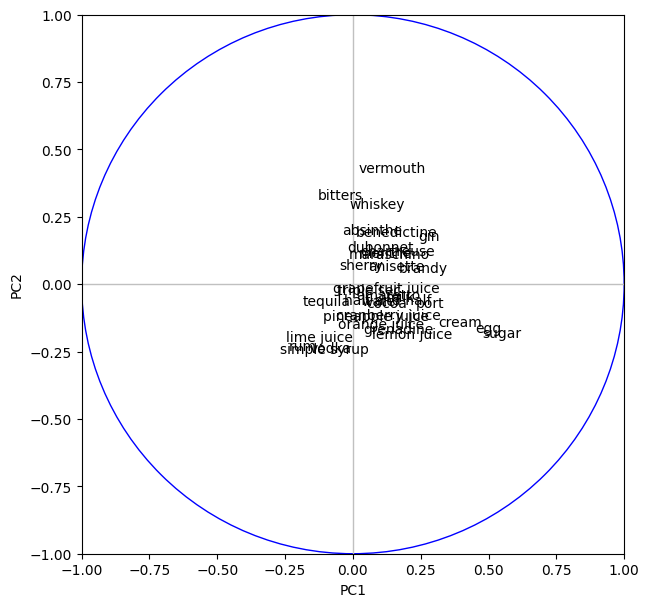

In [57]:
## Corrélations des variables aux axes principaux
loadings_df = pd.DataFrame.from_dict(dict(zip(["PC"+str(i) for i in list(range(1, cls.n_features_+1))], cls.components_)))
loadings_df['variable'] = bc_mci_wide.columns.values
loadings_df = loadings_df.set_index('variable')

## Cercle des corrélations
fig, axes = plt.subplots(figsize=(7, 7))
plt.xlabel('PC1')
plt.ylabel('PC2')
axes.set_xlim(-1, 1)
axes.set_ylim(-1, 1)

## Affichage des étiquettes (noms des variables)
for j in range(34):
    plt.annotate(bc_mci_wide.columns[j],(loadings_df.iloc[j,0],loadings_df.iloc[j,1]))

## Ajout des axes
plt.plot([-1,1],[0,0], color='silver', linestyle='-', linewidth=1)
plt.plot([0,0],[-1,1], color='silver', linestyle='-', linewidth=1)

## Ajout d'un cercle
cercle = plt.Circle((0, 0), 1, color='blue', fill=False)
axes.add_artist(cercle)

## Affichage
plt.savefig('imgs/circle_of_relationships.pdf', bbox_inches='tight')
plt.show()
plt.close()

Corrélation des variables à PC1 et PC2.

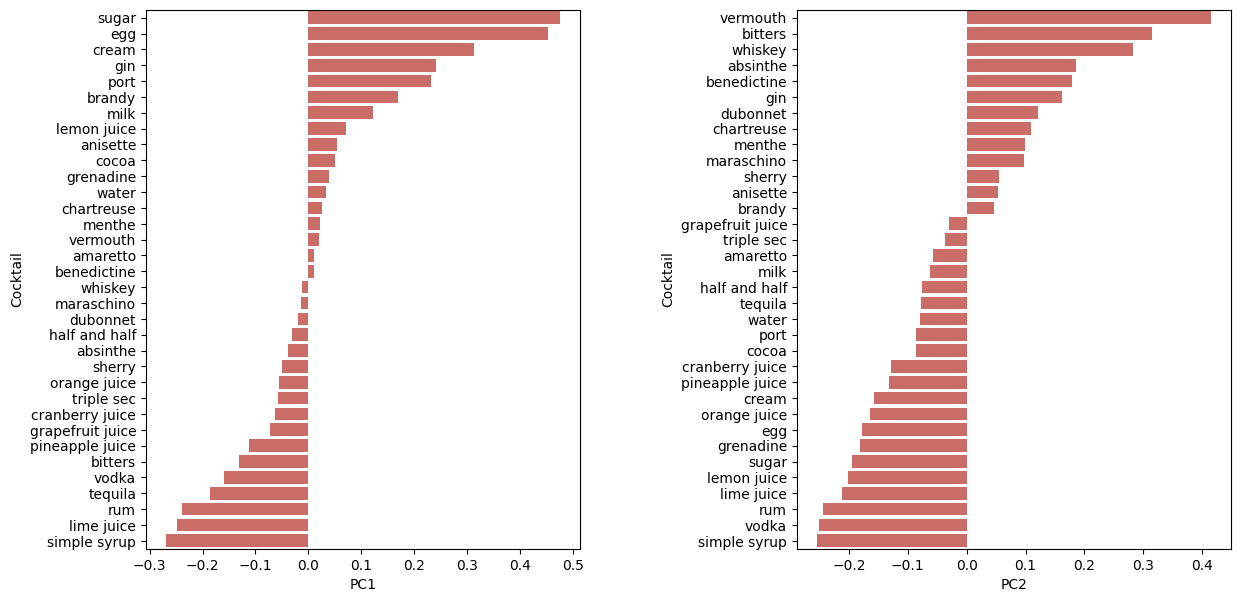

In [58]:
loadings_df_pc1 = loadings_df.sort_values(by='PC1', ascending=False)
loadings_df_pc2 = loadings_df.sort_values(by='PC2', ascending=False)

plt.figure(figsize=(14, 7))
plt.gcf().subplots_adjust(wspace=0.5)
plt.subplot(1, 2, 1)
fig1 = sns.barplot(x=loadings_df_pc1.iloc[:,0], y=loadings_df_pc1.index)
plt.ylabel('Cocktail')
plt.subplot(1, 2, 2)
fig2 = sns.barplot(x=loadings_df_pc2.iloc[:,1], y=loadings_df_pc2.index)
plt.ylabel('Cocktail')
plt.savefig('imgs/correlations.pdf', bbox_inches='tight')
plt.show()
plt.close()

## 3/ K-means method

In [59]:
from src.kmeans_stability6 import kmeans_dataset

In [60]:
bc_kmeans = df_pca.copy()
bc_kmeans = bc_kmeans[['PC1', 'PC2', 'category']]
bc_kmeans['category'] = bc_kmeans.apply(lambda row : "cocktail classics" if row['category']=="cocktail classics" else "autre", axis=1)

In [61]:
bc_kmeans.head()

,PC1,PC2,category
name,,,
1626,-0.176211,2.571268,autre
19th century,0.174663,0.111678,autre
a. j.,-0.329896,0.149355,cocktail classics
absinthe cocktail,0.003648,2.510380,cocktail classics
absinthe drip cocktail,1.469671,-0.446063,cocktail classics


In [62]:
bc_kmeans.shape

(963, 3)

C:\Users\Thomas\AppData\Local\Temp\ipykernel_33024\3860681493.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  fig = sns.lineplot(x="n_clusters", y="inertia", data=df.loc[df.init == 'random'], err_style='bars', ci='sd')


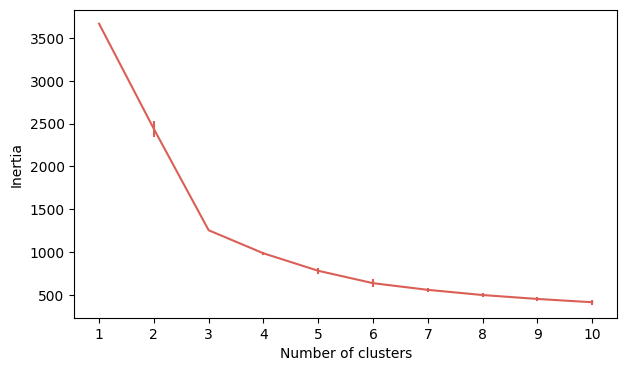

In [63]:
gen = kmeans_dataset(bc_kmeans.drop(columns='category', axis=1), range(1, 11), ['random'], 20)
df = pd.DataFrame(gen, columns=["seed", "init", "n_clusters", "inertia"])

plt.figure(figsize=(7, 4))
fig = sns.lineplot(x="n_clusters", y="inertia", data=df.loc[df.init == 'random'], err_style='bars', ci='sd')
fig.set(xlabel="Number of clusters", ylabel="Inertia")
fig.set_xticks(range(1, 11))
plt.savefig('imgs/kmeans_coude.pdf', bbox_inches='tight')
plt.show()
plt.close()

C:\Users\Thomas\anaconda3\envs\bikes-count\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


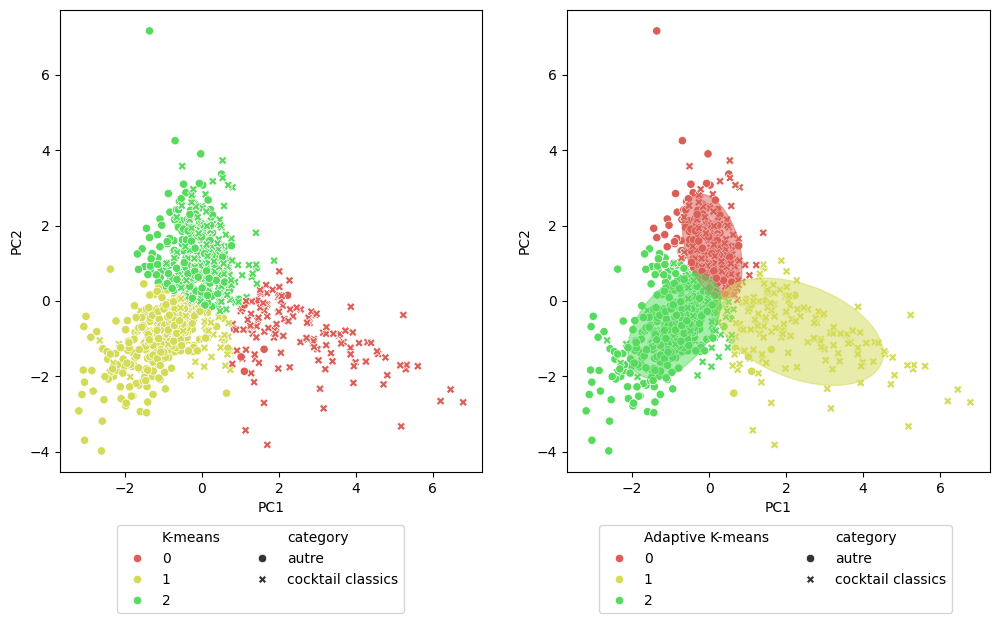

In [64]:
from sklearn.cluster import KMeans
from src.utils6 import scatterplot_pca

from src.adaptive_kmeans6 import *
from src.utils6 import plot_clustering

cls = KMeans(n_clusters=3, init='random')
cls.fit(bc_kmeans.drop(columns='category', axis=1))
labels = pd.Series(cls.labels_, name='K-means')

cls2 = AdaptiveKMeans(n_clusters=3)
labels2 = cls2.fit_predict(bc_kmeans.drop(columns='category', axis=1).to_numpy())
labels2 = pd.Series(labels2, name='Adaptive K-means')

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
scatterplot_pca(data=bc_kmeans.drop(columns='category', axis=1), hue=labels, style=bc_kmeans['category'])
plt.legend(bbox_to_anchor=(0.12, -0.1), loc='upper left', ncol=2)

plt.subplot(1, 2, 2)
plot_clustering(bc_kmeans.drop(columns='category', axis=1), clus1=labels2, clus2=bc_kmeans['category'], centers=cls2.cluster_centers_, covars=cls2.covars_)
plt.legend(bbox_to_anchor=(0.06, -0.1), loc='upper left', ncol=2)

plt.savefig('imgs/kmeans.pdf', bbox_inches='tight')
plt.show()
plt.close()

Matching of the score found to the actual score.

In [65]:
from sklearn.metrics import adjusted_rand_score

cls2 = KMeans(n_clusters=2)
cls2.fit_predict(bc_kmeans.drop(columns='category', axis=1))
s2 = adjusted_rand_score(bc_kmeans['category'], labels2)

cls2a = AdaptiveKMeans(n_clusters=2)
labels2a = cls2a.fit_predict(bc_kmeans.drop(columns='category', axis=1).to_numpy())
s2a = adjusted_rand_score(bc_kmeans['category'], labels2a)
print("2 : ", s2, s2a)

cls3 = KMeans(n_clusters=3)
labels3 = cls3.fit_predict(bc_kmeans.drop(columns='category', axis=1))
s3 = adjusted_rand_score(bc_kmeans['category'], labels3)

cls3a = AdaptiveKMeans(n_clusters=3)
labels3a = cls3a.fit_predict(bc_kmeans.drop(columns='category', axis=1).to_numpy())
s3a = adjusted_rand_score(bc_kmeans['category'], labels3a)
print("3 : ", s3, s3a)

2 :  0.19161199816036123 0.1935178768213335
3 :  0.1406857790985106 0.13452507076167758


C:\Users\Thomas\anaconda3\envs\bikes-count\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Thomas\anaconda3\envs\bikes-count\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


## 5/ K-Nearest Neighbors Method (KPPV)

### 5.1/ Creating a training and test set

In [66]:
from sklearn.model_selection import train_test_split

bc_kppv = df_pca.copy()
bc_kppv = bc_kppv[['PC1', 'PC2', 'category']]
bc_kppv['category'] = bc_kppv.apply(lambda row : "cocktail classics" if row['category']=="cocktail classics" else "autre", axis=1)

X = bc_kppv.drop(columns='category', axis=1)
y = bc_kppv['category']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.66)

In [67]:
bc_kppv

,PC1,PC2,category
name,,,
1626,-0.176211,2.571268,autre
19th century,0.174663,0.111678,autre
a. j.,-0.329896,0.149355,cocktail classics
absinthe cocktail,0.003648,2.510380,cocktail classics
absinthe drip cocktail,1.469671,-0.446063,cocktail classics
...,...,...,...
yokahama romance,0.187587,0.600998,autre
yolanda,0.562296,0.991157,cocktail classics
zaza cocktail,0.316281,1.049670,cocktail classics


### 5.2/ Choosing the number of neighbours

In [68]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# De 1 à 500 voisins (exclu), échelle logarithmique
n_neighbors_list = np.unique(np.round(np.geomspace(1, 500, 100)).astype(int))

df = pd.DataFrame(gen, columns=["# neighbors", "accuracy", "degrés de liberté"])
param_grid = {"n_neighbors": n_neighbors_list}

cls = KNeighborsClassifier()
search = GridSearchCV(cls, param_grid, scoring="accuracy", cv=10)
search.fit(X_train, y_train)

Kopt = search.best_params_['n_neighbors']
Kopt

81

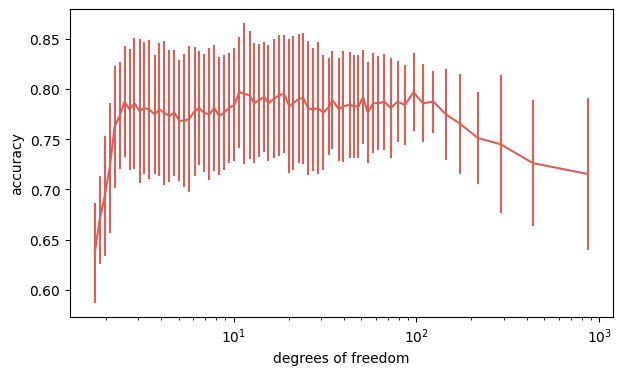

In [69]:
df = pd.DataFrame((dict(n_neighbors=d["n_neighbors"], error=e, std=s) for d, e, s in zip(search.cv_results_["params"], search.cv_results_["mean_test_score"], search.cv_results_["std_test_score"])))
n = 9/10 * len(y)

plt.figure(figsize=(7, 4))
plt.errorbar(n/df["n_neighbors"], df["error"], yerr=df["std"])
plt.xlabel("degrees of freedom")
plt.ylabel("accuracy")
plt.xscale("log")
plt.savefig('imgs/kppv_selectionk.pdf', bbox_inches='tight')
plt.show()
plt.close()

### 5.3/ Decision boundaries

C:\Users\Thomas\anaconda3\envs\bikes-count\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


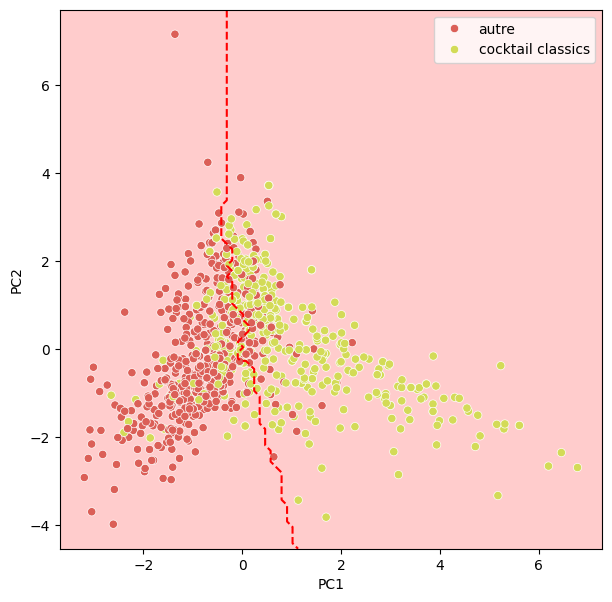

In [70]:
from src.utils7 import *

plt.figure(figsize=(7, 7))

plot_clustering(X, y)
add_decision_boundary(search)
plt.savefig('imgs/kppv_frontieredecision.pdf', bbox_inches='tight')
plt.show()
plt.close()

### 5.4/ Estimating performance

In [71]:
from sklearn.metrics import accuracy_score

y_pred = search.predict(X_test)
accuracy_score(y_pred, y_test)

0.7804878048780488

## 6/ Discriminant analysis

In [72]:
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

In [73]:
def validation_errors(df, models):
    y = df["z"]
    X = df.drop(columns="z", axis=1)
    for model, name in models:
        for acc in cross_val_score(model(), X, y, cv=10):
            yield name, acc

In [74]:
def add_decision_boundaries(df, models):
    colors = sns.color_palette()
    for model, name in models:
        y = df["z"]
        X = df.drop(columns="z", axis=1)
        cls = model()
        cls.fit(X, y)
        add_decision_boundary(cls, label=name, color=colors.pop(), region=False)

Analyse sur les modèles LDA, QDA et NB.

In [75]:
models = [
    (LinearDiscriminantAnalysis, "LDA"),
    (QuadraticDiscriminantAnalysis, "QDA"),
    (GaussianNB, "NB")
]

In [76]:
bc_prediction = df_pca.copy()
bc_prediction = bc_prediction[['PC1', 'PC2', 'category']]
bc_prediction.head()

,PC1,PC2,category
name,,,
1626,-0.176211,2.571268,whiskies
19th century,0.174663,0.111678,whiskies
a. j.,-0.329896,0.149355,cocktail classics
absinthe cocktail,0.003648,2.510380,cocktail classics
absinthe drip cocktail,1.469671,-0.446063,cocktail classics


### 6.1/ Variable to be predicted: the ‘cocktail classics’ cocktail category

In [77]:
bc_prediction['z'] = bc_prediction.apply(lambda row : 1 if row['category']=="cocktail classics" else -1, axis = 1)

In [78]:
bc_prediction.drop(columns=['category'], inplace=True)

### 6.2/ Decision boundaries for the different models

C:\Users\Thomas\anaconda3\envs\bikes-count\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
C:\Users\Thomas\anaconda3\envs\bikes-count\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
C:\Users\Thomas\anaconda3\envs\bikes-count\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


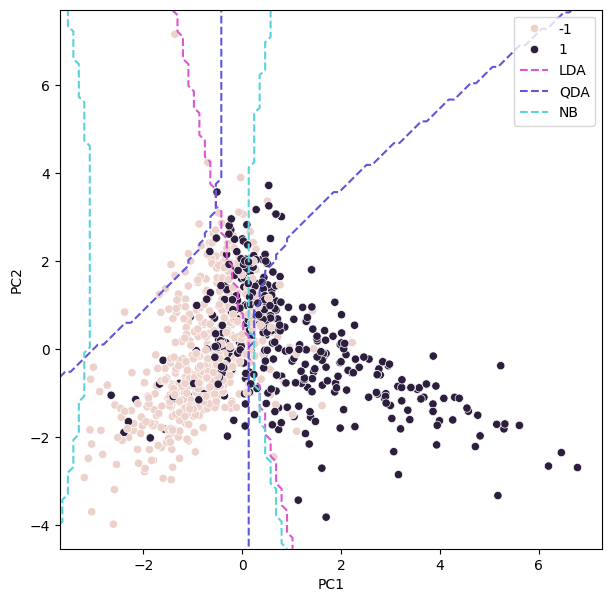

In [79]:
plt.figure(figsize=(7, 7))
sns.scatterplot(x="PC1", y="PC2", data=bc_prediction, hue="z")
add_decision_boundaries(bc_prediction, models)
plt.savefig('imgs/ADL_ADQ_NB.pdf', bbox_inches='tight')
plt.show()
plt.close()

### 6.3/ Performance of each model

C:\Users\Thomas\AppData\Local\Temp\ipykernel_33024\1540725288.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  fig = sns.lineplot(x="model", y="accuracy", data=df, ci="sd")


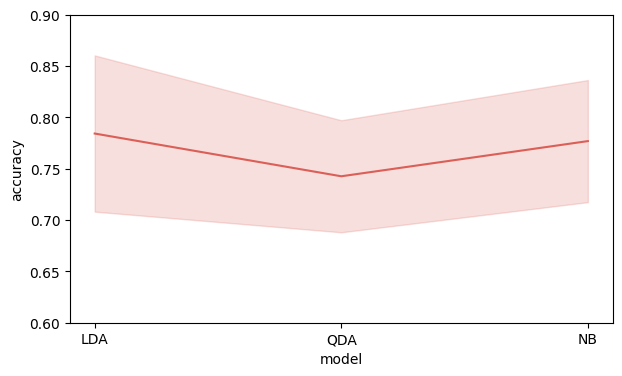

In [80]:
df = pd.DataFrame(validation_errors(bc_prediction, models), columns=["model", "accuracy"])

plt.figure(figsize=(7, 4))
fig = sns.lineplot(x="model", y="accuracy", data=df, ci="sd")
fig.set_yticks([0.60, 0.65, 0.70, 0.75, 0.80, 0.85, 0.90])
plt.savefig('imgs/accuracy.pdf', bbox_inches='tight')
plt.show()
plt.close()

In [81]:
np.mean(df.loc[df['model'] == 'LDA', 'accuracy'])

0.7842783505154639

## 7/ Logistic regression

In [82]:
bc_prediction.head()

,PC1,PC2,z
name,,,
1626,-0.176211,2.571268,-1
19th century,0.174663,0.111678,-1
a. j.,-0.329896,0.149355,1
absinthe cocktail,0.003648,2.510380,1
absinthe drip cocktail,1.469671,-0.446063,1


In [83]:
X = bc_prediction[['PC1','PC2']]
y = bc_prediction['z']

### 7.1/ We're learning the model.

We're learning the model.

In [84]:
from sklearn.linear_model import LogisticRegression

cls = LogisticRegression(penalty="none")
cls.fit(X, y)

C:\Users\Thomas\anaconda3\envs\bikes-count\lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


LogisticRegression(penalty='none')

We represent the decision boundary.

C:\Users\Thomas\anaconda3\envs\bikes-count\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Thomas\anaconda3\envs\bikes-count\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


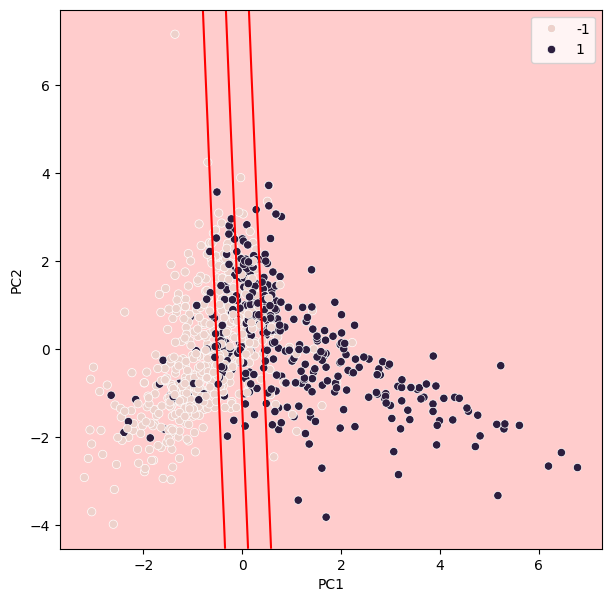

In [85]:
plt.figure(figsize=(7, 7))
sns.scatterplot(x="PC1", y="PC2", hue="z", data=bc_prediction[['PC1','PC2','z']])
levels = [.3, .5, .7]
add_decision_boundary(cls, levels=levels)
plt.show()

The decision boundary is back.

In [86]:
cls.coef_

array([[1.82355597, 0.06671507]])

In [87]:
cls.intercept_

array([0.08684109])

### 7.2/ Quadratic logistic regression

In [88]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

We're learning the model.

In [89]:
poly = PolynomialFeatures(degree=2)
cls = LogisticRegression(fit_intercept=False)
pipe = make_pipeline(poly, cls)
pipe.fit(X, y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('logisticregression',
                 LogisticRegression(fit_intercept=False))])

We represent the decision boundary.

C:\Users\Thomas\anaconda3\envs\bikes-count\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


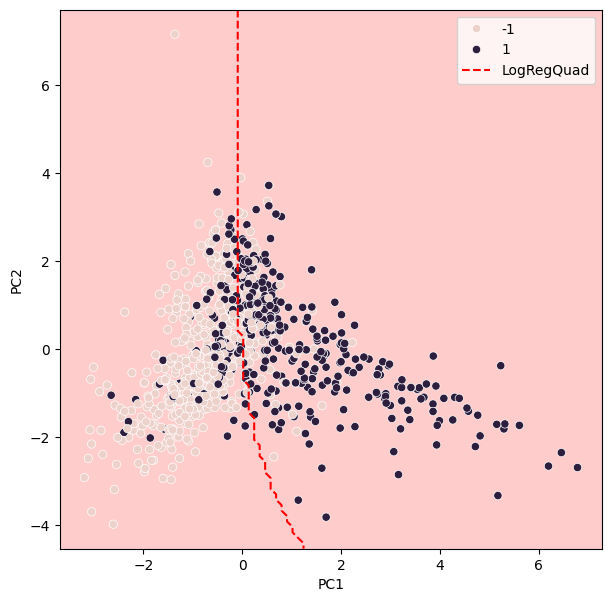

In [90]:
plt.figure(figsize=(7, 7))
sns.scatterplot(x="PC1", y="PC2", hue="z", data=bc_prediction)
add_decision_boundary(pipe, label="LogRegQuad")
plt.show()
plt.close()

The decision boundary is back.

In [91]:
cls.coef_

array([[ 0.00839658,  1.91766044,  0.16984752,  0.12710618,  0.26175905,
        -0.01828409]])

### 7.3/ Logistic regression and quadratic logistic regression

C:\Users\Thomas\anaconda3\envs\bikes-count\lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\Thomas\anaconda3\envs\bikes-count\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Thomas\anaconda3\envs\bikes-count\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Thomas\anaconda3\envs\bikes-count\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


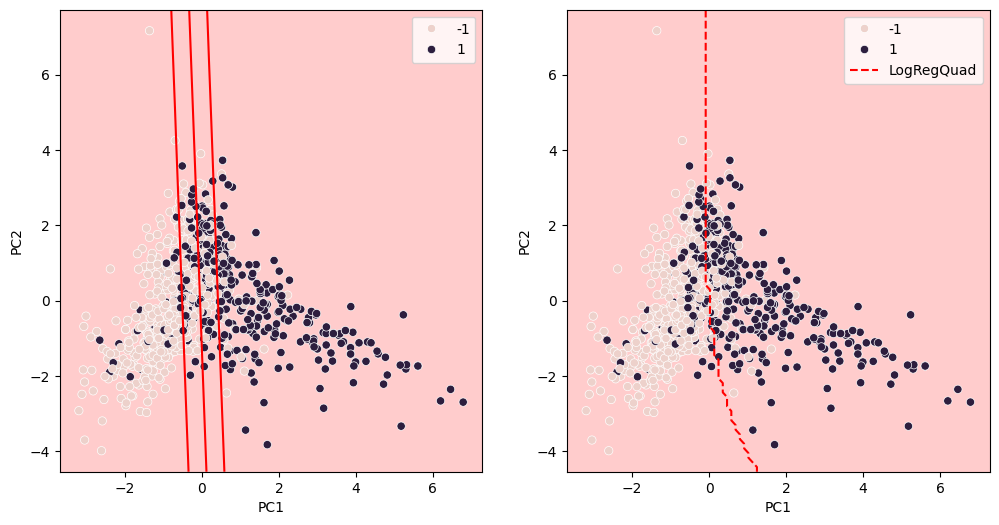

In [92]:
cls = LogisticRegression(penalty="none")
cls.fit(X, y)

poly = PolynomialFeatures(degree=2)
cls2 = LogisticRegression(fit_intercept=False)
pipe = make_pipeline(poly, cls2)
pipe.fit(X, y)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x="PC1", y="PC2", hue="z", data=bc_prediction[['PC1','PC2','z']])
levels = [.3, .5, .7]
add_decision_boundary(cls, levels=levels)

plt.subplot(1, 2, 2)
sns.scatterplot(x="PC1", y="PC2", hue="z", data=bc_prediction)
add_decision_boundary(pipe, label="LogRegQuad")

plt.savefig('imgs/logistic_and_quadratic_regression.pdf', bbox_inches='tight')
plt.show()
plt.close()

### 7.4/ Analysis of regression coefficients

In [93]:
y = y.apply(lambda row : 1 if row==1 else 0)

In [94]:
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd

# Assuming X is your feature DataFrame
poly = PolynomialFeatures(degree=2)

# Transform the data
X_poly = pd.DataFrame(
    data=poly.fit_transform(X),
    columns=poly.get_feature_names_out(X.columns)
)

# Display the transformed polynomial features
X_poly.head()


,1,PC1,PC2,PC1^2,PC1 PC2,PC2^2
0,1.0,-0.176211,2.571268,0.031050,-0.453085,6.611419
1,1.0,0.174663,0.111678,0.030507,0.019506,0.012472
2,1.0,-0.329896,0.149355,0.108831,-0.049272,0.022307
3,1.0,0.003648,2.510380,0.000013,0.009158,6.302009
4,1.0,1.469671,-0.446063,2.159932,-0.655566,0.198972


In [95]:
cls = LogisticRegression(fit_intercept=False, penalty="none", solver="newton-cg")
cls.fit(X_poly, y)

C:\Users\Thomas\anaconda3\envs\bikes-count\lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


LogisticRegression(fit_intercept=False, penalty='none', solver='newton-cg')

Wald test to test the significance of beta coefficients by approximating the variance of the estimated coefficient.

In [96]:
import scipy.stats as spst

def Waldtest_LR(model, X):
    prob = model.predict_proba(X)
    What = np.diag(np.product(prob, axis=1))
    In_F = np.dot(np.dot(X.T, What), X)
    shat = np.sqrt(np.diag(np.linalg.inv(In_F)))
    zscores = model.coef_ / shat
    nonsign = np.abs(zscores) <= spst.norm.ppf(1 - 0.05 / 2, loc=0, scale=1)
    return zscores, nonsign

Calculation of non-significant variables.

In [97]:
Coef = Waldtest_LR(cls, X_poly)[0][0]
Rejet = Waldtest_LR(cls, X_poly)[1][0]
Columns = X_poly.columns

for i in range(len(Coef)):
    if Rejet[i]:
        print("Reject variable : ", Columns[i], "with Z-score : ", Coef[i])
    else:
        print("Non-Reject variable : ", Columns[i], "with Z-score : ", Coef[i])

Reject variable :  1 with Z-score :  0.10256702059277238
Non-Reject variable :  PC1 with Z-score :  13.545897106207239
Non-Reject variable :  PC2 with Z-score :  1.9679446831077194
Reject variable :  PC1^2 with Z-score :  1.1542974982359289
Non-Reject variable :  PC1 PC2 with Z-score :  2.8495080002881465
Reject variable :  PC2^2 with Z-score :  -0.44939254100135456


C:\Users\Thomas\AppData\Local\Temp\ipykernel_33024\2754324159.py:1: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  Coef = Waldtest_LR(cls, X_poly)[0][0]
C:\Users\Thomas\AppData\Local\Temp\ipykernel_33024\2754324159.py:2: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  Rejet = Waldtest_LR(cls, X_poly)[1][0]


Likelihood ratio test. Algorithm that removes the least significant variables from the dataset one by one as long as the performance of the restricted model is not significantly degraded.

In [98]:
from sklearn.metrics import log_loss

def loglike_LR(model, X, y):
    targ = np.column_stack((1 - y, y))
    prob = model.predict_proba(X)
    return -log_loss(targ, prob, normalize=False)

In [99]:
import copy as cp

it = 0

ll = loglike_LR(cls, X_poly, y)
X_ = cp.copy(X_poly)
cls_ = LogisticRegression(fit_intercept=False, penalty="none", solver="newton-cg")
cls_.fit(X_, y)
ll_ = loglike_LR(cls_, X_, y)

while (2 * (ll - ll_) <= spst.chi2.ppf(1 - 0.05, 1)) and (it < 10):
    Xopt = cp.copy(X_)
    clsopt = cp.copy(cls_)
    llopt = cp.copy(ll_)
    lltab = np.zeros(Xopt.shape[1])
    for i in range(Xopt.shape[1]):
        X_ = cp.copy(Xopt)
        X_.drop(columns=X_.columns[i], inplace=True)
        cls_.fit(X_, y)
        lltab[i] = loglike_LR(cls_, X_, y)
    X_ = cp.copy(Xopt)
    X_.drop(columns=X_.columns[lltab.argmax()], inplace=True)
    cls_.fit(X_, y)
    ll_ = loglike_LR(cls_, X_, y)
    
    it = it + 1

C:\Users\Thomas\anaconda3\envs\bikes-count\lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\Thomas\anaconda3\envs\bikes-count\lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\Thomas\anaconda3\envs\bikes-count\lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\Thomas\anaconda3\envs\bikes-count\lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warning

In [100]:
Xopt.columns

Index(['PC1', 'PC2', 'PC1 PC2'], dtype='object')

In [101]:
clsopt.coef_

array([[1.92324691, 0.13360564, 0.29555654]])

Model performance.

In [102]:
X_poly_train, X_poly_test, y_train, y_test = train_test_split(X_poly[['PC1', 'PC2', 'PC1 PC2']], y, train_size=0.66)

In [103]:
cls = LogisticRegression(fit_intercept=False, penalty="none", solver="newton-cg")
cls.fit(X_poly_train, y_train)

C:\Users\Thomas\anaconda3\envs\bikes-count\lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


LogisticRegression(fit_intercept=False, penalty='none', solver='newton-cg')

In [104]:
cls.coef_

array([[1.87488399, 0.16622672, 0.32639286]])

In [105]:
y_pred = clsopt.predict(X_poly_test)
accuracy_score(y_pred, y_test)

0.8048780487804879

### 7.5/ Logistic regression with the first 20 principal components

In [106]:
bc_prediction2 = df_pca.copy()
bc_prediction2['z'] = bc_prediction2.apply(lambda row : 1 if row['category']=="cocktail classics" else 0, axis = 1)
bc_prediction2.drop(columns=['category'], inplace=True)
bc_prediction2.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,z
name,,,,,,,,,,,,,,,,,,,,,
1626,-0.176211,2.571268,-0.428896,-1.506432,1.158230,0.568623,-0.214203,0.146370,-0.718654,0.457022,...,-0.295175,-0.010068,0.364032,0.686931,-1.068019,0.466540,-0.239015,0.419034,0.193617,0
19th century,0.174663,0.111678,1.224294,-1.543388,1.330797,-0.787267,-1.240900,-0.377792,-2.034231,0.238690,...,-0.199855,-0.886795,-1.172005,-0.164706,-0.574363,-0.419508,-0.531729,-0.022563,-0.215846,0
a. j.,-0.329896,0.149355,0.515315,0.135347,0.053042,-0.240825,0.553022,0.308405,0.216719,-0.393404,...,0.303258,0.954426,-0.919465,-0.383148,-0.223141,1.449808,-0.801180,0.301878,-0.562457,1
absinthe cocktail,0.003648,2.510380,-0.326655,-1.484482,0.904991,1.885767,-3.688290,2.793712,6.096105,4.614918,...,6.856348,-0.432403,0.419609,-2.886531,-1.841932,-0.653876,-2.709225,-0.355597,3.895067,1
absinthe drip cocktail,1.469671,-0.446063,-0.223394,0.010118,0.559518,0.089400,0.364779,-0.090432,0.358147,0.095743,...,-0.308315,0.533268,0.400139,0.142199,-0.293702,0.295632,-0.006472,-0.168106,-0.008658,1


In [107]:
X = bc_prediction2.drop(columns='z')
X["intercept"] = 1.0
y = bc_prediction2['z']

In [108]:
X.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,intercept
name,,,,,,,,,,,,,,,,,,,,,
1626,-0.176211,2.571268,-0.428896,-1.506432,1.158230,0.568623,-0.214203,0.146370,-0.718654,0.457022,...,-0.295175,-0.010068,0.364032,0.686931,-1.068019,0.466540,-0.239015,0.419034,0.193617,1.0
19th century,0.174663,0.111678,1.224294,-1.543388,1.330797,-0.787267,-1.240900,-0.377792,-2.034231,0.238690,...,-0.199855,-0.886795,-1.172005,-0.164706,-0.574363,-0.419508,-0.531729,-0.022563,-0.215846,1.0
a. j.,-0.329896,0.149355,0.515315,0.135347,0.053042,-0.240825,0.553022,0.308405,0.216719,-0.393404,...,0.303258,0.954426,-0.919465,-0.383148,-0.223141,1.449808,-0.801180,0.301878,-0.562457,1.0
absinthe cocktail,0.003648,2.510380,-0.326655,-1.484482,0.904991,1.885767,-3.688290,2.793712,6.096105,4.614918,...,6.856348,-0.432403,0.419609,-2.886531,-1.841932,-0.653876,-2.709225,-0.355597,3.895067,1.0
absinthe drip cocktail,1.469671,-0.446063,-0.223394,0.010118,0.559518,0.089400,0.364779,-0.090432,0.358147,0.095743,...,-0.308315,0.533268,0.400139,0.142199,-0.293702,0.295632,-0.006472,-0.168106,-0.008658,1.0


We're learning the model.

In [109]:
cls = LogisticRegression(fit_intercept=False, penalty="none", solver="newton-cg")
cls.fit(X, y)

C:\Users\Thomas\anaconda3\envs\bikes-count\lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


LogisticRegression(fit_intercept=False, penalty='none', solver='newton-cg')

Wald test.

In [110]:
Coef = Waldtest_LR(cls, X)[0][0]
Rejet = Waldtest_LR(cls, X)[1][0]
Columns = X.columns

for i in range(len(Coef)):
    if Rejet[i]:
        print("Reject of variable : ", Columns[i], "with Z-score : ", Coef[i])
    else:
        print("Non-reject of variable : ", Columns[i], "with Z-score : ", Coef[i])

Non-reject of variable :  PC1 with Z-score :  12.397008017942838
Reject of variable :  PC2 with Z-score :  0.8582103986643216
Non-reject of variable :  PC3 with Z-score :  -3.1205802230849207
Non-reject of variable :  PC4 with Z-score :  7.690427924547899
Non-reject of variable :  PC5 with Z-score :  -2.8533543479078816
Reject of variable :  PC6 with Z-score :  -0.8169918809962068
Reject of variable :  PC7 with Z-score :  0.41100784559380293
Reject of variable :  PC8 with Z-score :  -1.5308323282257825
Reject of variable :  PC9 with Z-score :  -0.8907253180188335
Reject of variable :  PC10 with Z-score :  1.2448531676168728
Reject of variable :  PC11 with Z-score :  -0.3010259957739116
Reject of variable :  PC12 with Z-score :  0.13322325226503792
Non-reject of variable :  PC13 with Z-score :  3.072308074188543
Reject of variable :  PC14 with Z-score :  -0.27864206230248334
Non-reject of variable :  PC15 with Z-score :  -1.9842608356651474
Non-reject of variable :  PC16 with Z-score : 

C:\Users\Thomas\AppData\Local\Temp\ipykernel_33024\3285408752.py:1: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  Coef = Waldtest_LR(cls, X)[0][0]
C:\Users\Thomas\AppData\Local\Temp\ipykernel_33024\3285408752.py:2: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  Rejet = Waldtest_LR(cls, X)[1][0]


Test du rapport de vraisemblance.

In [111]:
it = 0

cls = LogisticRegression(fit_intercept=False, penalty="none", solver="newton-cg")
cls.fit(X, y)

ll = loglike_LR(cls, X, y)
X_ = cp.copy(X)
cls_ = LogisticRegression(fit_intercept=False, penalty="none", solver="newton-cg")
cls_.fit(X_, y)
ll_ = loglike_LR(cls_, X_, y)

while (2 * (ll - ll_) <= spst.chi2.ppf(1 - 0.05, 1)) and (it < 10):
    Xopt = cp.copy(X_)
    clsopt = cp.copy(cls_)
    llopt = cp.copy(ll_)
    lltab = np.zeros(Xopt.shape[1])
    for i in range(Xopt.shape[1]):
        X_ = cp.copy(Xopt)
        X_.drop(columns=X_.columns[i], inplace=True)
        cls_.fit(X_, y)
        lltab[i] = loglike_LR(cls_, X_, y)
    X_ = cp.copy(Xopt)
    X_.drop(columns=X_.columns[lltab.argmax()], inplace=True)
    cls_.fit(X_, y)
    ll_ = loglike_LR(cls_, X_, y)
    
    it = it + 1

C:\Users\Thomas\anaconda3\envs\bikes-count\lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\Thomas\anaconda3\envs\bikes-count\lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\Thomas\anaconda3\envs\bikes-count\lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\Thomas\anaconda3\envs\bikes-count\lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warning

In [112]:
Xopt.columns

Index(['PC1', 'PC3', 'PC4', 'PC5', 'PC8', 'PC10', 'PC13', 'PC15', 'PC16',
       'PC18', 'PC19', 'PC20', 'intercept'],
      dtype='object')

In [113]:
clsopt.coef_

array([[ 2.01957176, -0.30450102,  0.68226694, -0.24545341, -0.15619748,
         0.13558666,  0.30933298, -0.25644727, -0.29155769,  0.13396024,
        -0.17458906,  0.13681152,  0.16315888]])